In [2]:
#Libraries importieren

import pandas as pd
import simfin as sf
from simfin.names import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
sf.set_data_dir("simfin data")
sf.set_api_key(api_key = "MyAPIKey")

In [8]:
income = sf.load_income(variant="quarterly", market="us")
cashflow = sf.load_cashflow(variant="quarterly", market="us")
balancesheet = sf.load_balance(variant="quarterly", market="us")

Dataset "us-income-quarterly" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-cashflow-quarterly" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-balance-quarterly" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [12]:
income.isnull().sum()*100/len(income)

SimFinId                                     0.000000
Currency                                     0.000000
Fiscal Year                                  0.000000
Fiscal Period                                0.000000
Publish Date                                 0.000000
Restated Date                                0.000000
Shares (Basic)                               0.468404
Shares (Diluted)                             0.471175
Revenue                                      2.175721
Cost of Revenue                              9.262749
Gross Profit                                 9.379157
Operating Expenses                           0.169069
Selling, General & Administrative            4.997228
Research & Development                      58.633592
Depreciation & Amortization                 55.274390
Operating Income (Loss)                      0.002772
Non-Operating Income (Loss)                  0.546009
Interest Expense, Net                       10.945122
Pretax Income (Loss), Adj.  

In [13]:
cashflow.isnull().sum()*100/len(cashflow)

SimFinId                                      0.000000
Currency                                      0.000000
Fiscal Year                                   0.000000
Fiscal Period                                 0.000000
Publish Date                                  0.000000
Restated Date                                 0.000000
Shares (Basic)                                0.468404
Shares (Diluted)                              0.471175
Net Income/Starting Line                      1.152993
Depreciation & Amortization                   2.552661
Non-Cash Items                                1.261086
Change in Working Capital                     1.782151
Change in Accounts Receivable                92.333703
Change in Inventories                        94.476164
Change in Accounts Payable                   93.902439
Change in Other                              91.130820
Net Cash from Operating Activities            0.005543
Change in Fixed Assets & Intangibles          2.580377
Net Change

In [14]:
income = income.drop(income.columns[(income.isnull().sum()*100/len(income)>10)], axis=1)
cashflow = cashflow.drop(cashflow.columns[(cashflow.isnull().sum()*100/len(cashflow)>10)], axis=1)
balancesheet = balancesheet.drop(balancesheet.columns[(balancesheet.isnull().sum()*100/len(balancesheet)>10)], axis=1)

In [16]:
income.isnull().sum()*100/len(income)

SimFinId                                    0.000000
Currency                                    0.000000
Fiscal Year                                 0.000000
Fiscal Period                               0.000000
Publish Date                                0.000000
Restated Date                               0.000000
Shares (Basic)                              0.468404
Shares (Diluted)                            0.471175
Revenue                                     2.175721
Cost of Revenue                             9.262749
Gross Profit                                9.379157
Operating Expenses                          0.169069
Selling, General & Administrative           4.997228
Operating Income (Loss)                     0.002772
Non-Operating Income (Loss)                 0.546009
Pretax Income (Loss), Adj.                  0.000000
Pretax Income (Loss)                        0.000000
Income Tax (Expense) Benefit, Net           8.079268
Income (Loss) from Continuing Operations    0.

In [20]:
rows_to_drop = ["SimFinId", "Currency", "Fiscal Year", "Fiscal Period", "Publish Date", "Restated Date", "Shares (Basic)", "Shares (Diluted)"]

income = income.drop(rows_to_drop, axis=1)
cashflow = cashflow.drop(rows_to_drop, axis=1)
balancesheet = balancesheet.drop(rows_to_drop, axis=1)

In [21]:
df = income.merge(cashflow, on = [TICKER, REPORT_DATE], how="inner")
df = df.merge(balancesheet, on = [TICKER, REPORT_DATE], how="inner")

In [22]:
df

Revenue  Cost of Revenue  Gross Profit  \
Ticker Report Date                                                
A      2016-07-31   1.044000e+09     -502000000.0   542000000.0   
       2016-10-31   1.111000e+09     -523000000.0   588000000.0   
       2017-01-31   1.067000e+09     -493000000.0   574000000.0   
       2017-04-30   1.102000e+09     -510000000.0   592000000.0   
       2017-07-31   1.114000e+09     -518000000.0   596000000.0   
...                          ...              ...           ...   
ZYXI   2020-03-31   1.522800e+07       -3401000.0    11827000.0   
       2020-06-30   1.926300e+07       -4061000.0    15202000.0   
       2020-09-30   2.002600e+07       -4296000.0    15730000.0   
       2020-12-31   2.560500e+07       -5659000.0    19946000.0   
       2021-03-31   2.412700e+07       -5886000.0    18241000.0   

                    Operating Expenses  Selling, General & Administrative  \
Ticker Report Date                                                          
A      2016-07-31         -396000000.0                       -310000000.0   
       2016-10-31         -405000000.0                       -321000000.0   
       2017-01-31         -368000000.0                       -289000000.0   
       2017-04-30         -391000000.0                       -307000000.0   
       2017-07-31         -395000000.0                       -308000000.0   
...                                ...                                ...   
ZYXI   2020-03-31           -9369000.0                         -9369000.0   
       2020-06-30          -11117000.0                        -11117000.0   
       2020-09-30          -14321000.0                        -14321000.0   
       2020-12-31          -17649000.0                        -17649000.0   
       2021-03-31          -19322000.0                        -19322000.0   

                    Operating Income (Loss)  Non-Operating Income (Loss)  \
Ticker Report Date                                                         
A      2016-07-31               146000000.0                  -12000000.0   
       2016-10-31               183000000.0                  -32000000.0   
       2017-01-31               206000000.0                  -13000000.0   
       2017-04-30               201000000.0                  -10000000.0   
       2017-07-31               201000000.0                   -8000000.0   
...                                     ...                          ...   
ZYXI   2020-03-31                 2458000.0                      -4000.0   
       2020-06-30                 4085000.0                      -5000.0   
       2020-09-30                 1409000.0                      -5000.0   
       2020-12-31                 2297000.0                      -5000.0   
       2021-03-31                -1081000.0                      -9000.0   

                    Pretax Income (Loss), Adj.  Pretax Income (Loss)  \
Ticker Report Date                                                     
A      2016-07-31                    134000000             134000000   
       2016-10-31                    151000000             151000000   
       2017-01-31                    193000000             193000000   
       2017-04-30                    191000000             191000000   
       2017-07-31                    193000000             193000000   
...                                        ...                   ...   
ZYXI   2020-03-31                      2454000               2454000   
       2020-06-30                      4080000               4080000   
       2020-09-30                      1404000               1404000   
       2020-12-31                      2292000               2215000   
       2021-03-31                     -1090000              -1090000   

                    Income Tax (Expense) Benefit, Net  ...  \
Ticker Report Date                                     ...   
A      2016-07-31                         -10000000.0  ...   
       2016-10-31                      

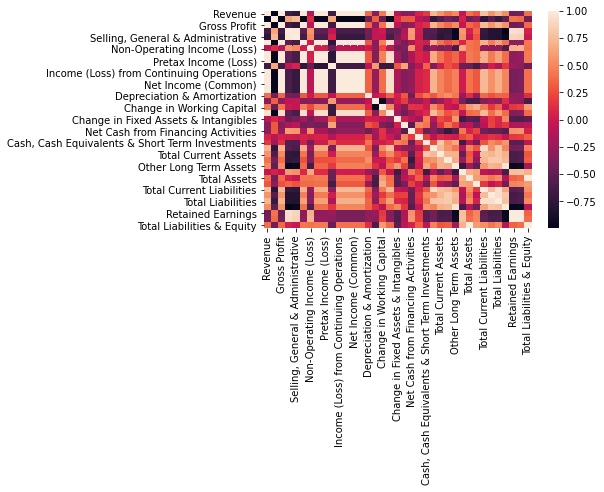

In [24]:
sns.heatmap(df.loc["AAPL"].corr());

In [25]:
aapl = df.loc["AAPL"]
aapl

,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",...,Total Noncurrent Assets,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity
Report Date,,,,,,,,,,,,,,,,,,,,,
2016-06-30,4.235800e+10,-2.625200e+10,1.610600e+10,-6.001000e+09,-3.441000e+09,1.010500e+10,364000000.0,10469000000,10469000000,-2.673000e+09,...,2.118410e+11,305602000000,4.713800e+10,7.148600e+10,1.075750e+11,179061000000,3.010600e+10,9.654200e+10,1.265410e+11,305602000000
2016-09-30,4.685200e+10,-2.903900e+10,1.781300e+10,-6.052000e+09,-3.482000e+09,1.176100e+10,427000000.0,12188000000,12188000000,-3.174000e+09,...,2.148170e+11,321686000000,5.932100e+10,7.900600e+10,1.144310e+11,193437000000,3.125100e+10,9.636400e+10,1.282490e+11,321686000000
2016-12-31,7.835100e+10,-4.817500e+10,3.017600e+10,-6.817000e+09,-3.946000e+09,2.335900e+10,821000000.0,24180000000,24180000000,-6.289000e+09,...,2.278090e+11,331141000000,6.224900e+10,8.413000e+10,1.146210e+11,198751000000,3.214400e+10,1.000010e+11,1.323900e+11,331141000000
2017-03-31,5.289600e+10,-3.230500e+10,2.059100e+10,-6.494000e+09,-3.718000e+09,1.409700e+10,587000000.0,14684000000,14684000000,-3.655000e+09,...,2.325420e+11,334532000000,5.166900e+10,7.334200e+10,1.271080e+11,200450000000,3.357900e+10,1.009250e+11,1.340820e+11,334532000000
2017-06-30,4.540800e+10,-2.792000e+10,1.748800e+10,-6.720000e+09,-3.783000e+09,1.076800e+10,540000000.0,11308000000,11308000000,-2.591000e+09,...,2.322980e+11,345173000000,5.521900e+10,8.130200e+10,1.314460e+11,212748000000,3.444500e+10,9.852500e+10,1.324250e+11,345173000000
2017-09-30,5.257900e+10,-3.264800e+10,1.993100e+10,-6.811000e+09,-3.814000e+09,1.312000e+10,797000000.0,13917000000,13917000000,-3.203000e+09,...,2.466740e+11,375319000000,4.424200e+10,1.008140e+11,1.404580e+11,241272000000,3.586700e+10,9.833000e+10,1.340470e+11,375319000000
2017-12-31,8.829300e+10,-5.438100e+10,3.391200e+10,-7.638000e+09,-4.231000e+09,2.627400e+10,756000000.0,27030000000,27030000000,-6.965000e+09,...,2.629840e+11,406794000000,8.926600e+10,1.157880e+11,1.508070e+11,266595000000,3.644700e+10,1.045930e+11,1.401990e+11,406794000000
2018-03-31,6.113700e+10,-3.771500e+10,2.342200e+10,-7.528000e+09,-4.150000e+09,1.589400e+10,274000000.0,16168000000,16168000000,-2.346000e+09,...,2.374490e+11,367502000000,6.106700e+10,8.932000e+10,1.513040e+11,240624000000,3.804400e+10,9.189800e+10,1.268780e+11,367502000000
2018-06-30,5.326500e+10,-3.284400e+10,2.042100e+10,-7.809000e+09,-4.108000e+09,1.261200e+10,672000000.0,13284000000,13284000000,-1.765000e+09,...,2.334360e+11,349197000000,6.367300e+10,8.854800e+10,1.457000e+11,234248000000,3.862400e+10,7.943600e+10,1.149490e+11,349197000000


In [26]:
aapl["Revenue_pred"] = aapl["Revenue"].shift(-1)

In [27]:
aapl

,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",...,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,Revenue_pred
Report Date,,,,,,,,,,,,,,,,,,,,,
2016-06-30,4.235800e+10,-2.625200e+10,1.610600e+10,-6.001000e+09,-3.441000e+09,1.010500e+10,364000000.0,10469000000,10469000000,-2.673000e+09,...,305602000000,4.713800e+10,7.148600e+10,1.075750e+11,179061000000,3.010600e+10,9.654200e+10,1.265410e+11,305602000000,4.685200e+10
2016-09-30,4.685200e+10,-2.903900e+10,1.781300e+10,-6.052000e+09,-3.482000e+09,1.176100e+10,427000000.0,12188000000,12188000000,-3.174000e+09,...,321686000000,5.932100e+10,7.900600e+10,1.144310e+11,193437000000,3.125100e+10,9.636400e+10,1.282490e+11,321686000000,7.835100e+10
2016-12-31,7.835100e+10,-4.817500e+10,3.017600e+10,-6.817000e+09,-3.946000e+09,2.335900e+10,821000000.0,24180000000,24180000000,-6.289000e+09,...,331141000000,6.224900e+10,8.413000e+10,1.146210e+11,198751000000,3.214400e+10,1.000010e+11,1.323900e+11,331141000000,5.289600e+10
2017-03-31,5.289600e+10,-3.230500e+10,2.059100e+10,-6.494000e+09,-3.718000e+09,1.409700e+10,587000000.0,14684000000,14684000000,-3.655000e+09,...,334532000000,5.166900e+10,7.334200e+10,1.271080e+11,200450000000,3.357900e+10,1.009250e+11,1.340820e+11,334532000000,4.540800e+10
2017-06-30,4.540800e+10,-2.792000e+10,1.748800e+10,-6.720000e+09,-3.783000e+09,1.076800e+10,540000000.0,11308000000,11308000000,-2.591000e+09,...,345173000000,5.521900e+10,8.130200e+10,1.314460e+11,212748000000,3.444500e+10,9.852500e+10,1.324250e+11,345173000000,5.257900e+10
2017-09-30,5.257900e+10,-3.264800e+10,1.993100e+10,-6.811000e+09,-3.814000e+09,1.312000e+10,797000000.0,13917000000,13917000000,-3.203000e+09,...,375319000000,4.424200e+10,1.008140e+11,1.404580e+11,241272000000,3.586700e+10,9.833000e+10,1.340470e+11,375319000000,8.829300e+10
2017-12-31,8.829300e+10,-5.438100e+10,3.391200e+10,-7.638000e+09,-4.231000e+09,2.627400e+10,756000000.0,27030000000,27030000000,-6.965000e+09,...,406794000000,8.926600e+10,1.157880e+11,1.508070e+11,266595000000,3.644700e+10,1.045930e+11,1.401990e+11,406794000000,6.113700e+10
2018-03-31,6.113700e+10,-3.771500e+10,2.342200e+10,-7.528000e+09,-4.150000e+09,1.589400e+10,274000000.0,16168000000,16168000000,-2.346000e+09,...,367502000000,6.106700e+10,8.932000e+10,1.513040e+11,240624000000,3.804400e+10,9.189800e+10,1.268780e+11,367502000000,5.326500e+10
2018-06-30,5.326500e+10,-3.284400e+10,2.042100e+10,-7.809000e+09,-4.108000e+09,1.261200e+10,672000000.0,13284000000,13284000000,-1.765000e+09,...,349197000000,6.367300e+10,8.854800e+10,1.457000e+11,234248000000,3.862400e+10,7.943600e+10,1.149490e+11,349197000000,6.290000e+10


In [28]:
aapl.dropna(inplace=True)

In [36]:
#come back and add this line after implementing
#print(metrics.r2_score(y_test, y_pred))

aapl = df.loc["AAPL"]
aapl

,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",...,Total Noncurrent Assets,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity
Report Date,,,,,,,,,,,,,,,,,,,,,
2016-06-30,4.235800e+10,-2.625200e+10,1.610600e+10,-6.001000e+09,-3.441000e+09,1.010500e+10,364000000.0,10469000000,10469000000,-2.673000e+09,...,2.118410e+11,305602000000,4.713800e+10,7.148600e+10,1.075750e+11,179061000000,3.010600e+10,9.654200e+10,1.265410e+11,305602000000
2016-09-30,4.685200e+10,-2.903900e+10,1.781300e+10,-6.052000e+09,-3.482000e+09,1.176100e+10,427000000.0,12188000000,12188000000,-3.174000e+09,...,2.148170e+11,321686000000,5.932100e+10,7.900600e+10,1.144310e+11,193437000000,3.125100e+10,9.636400e+10,1.282490e+11,321686000000
2016-12-31,7.835100e+10,-4.817500e+10,3.017600e+10,-6.817000e+09,-3.946000e+09,2.335900e+10,821000000.0,24180000000,24180000000,-6.289000e+09,...,2.278090e+11,331141000000,6.224900e+10,8.413000e+10,1.146210e+11,198751000000,3.214400e+10,1.000010e+11,1.323900e+11,331141000000
2017-03-31,5.289600e+10,-3.230500e+10,2.059100e+10,-6.494000e+09,-3.718000e+09,1.409700e+10,587000000.0,14684000000,14684000000,-3.655000e+09,...,2.325420e+11,334532000000,5.166900e+10,7.334200e+10,1.271080e+11,200450000000,3.357900e+10,1.009250e+11,1.340820e+11,334532000000
2017-06-30,4.540800e+10,-2.792000e+10,1.748800e+10,-6.720000e+09,-3.783000e+09,1.076800e+10,540000000.0,11308000000,11308000000,-2.591000e+09,...,2.322980e+11,345173000000,5.521900e+10,8.130200e+10,1.314460e+11,212748000000,3.444500e+10,9.852500e+10,1.324250e+11,345173000000
2017-09-30,5.257900e+10,-3.264800e+10,1.993100e+10,-6.811000e+09,-3.814000e+09,1.312000e+10,797000000.0,13917000000,13917000000,-3.203000e+09,...,2.466740e+11,375319000000,4.424200e+10,1.008140e+11,1.404580e+11,241272000000,3.586700e+10,9.833000e+10,1.340470e+11,375319000000
2017-12-31,8.829300e+10,-5.438100e+10,3.391200e+10,-7.638000e+09,-4.231000e+09,2.627400e+10,756000000.0,27030000000,27030000000,-6.965000e+09,...,2.629840e+11,406794000000,8.926600e+10,1.157880e+11,1.508070e+11,266595000000,3.644700e+10,1.045930e+11,1.401990e+11,406794000000
2018-03-31,6.113700e+10,-3.771500e+10,2.342200e+10,-7.528000e+09,-4.150000e+09,1.589400e+10,274000000.0,16168000000,16168000000,-2.346000e+09,...,2.374490e+11,367502000000,6.106700e+10,8.932000e+10,1.513040e+11,240624000000,3.804400e+10,9.189800e+10,1.268780e+11,367502000000
2018-06-30,5.326500e+10,-3.284400e+10,2.042100e+10,-7.809000e+09,-4.108000e+09,1.261200e+10,672000000.0,13284000000,13284000000,-1.765000e+09,...,2.334360e+11,349197000000,6.367300e+10,8.854800e+10,1.457000e+11,234248000000,3.862400e+10,7.943600e+10,1.149490e+11,349197000000


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
X = aapl.drop(["Revenue", "Revenue_pred"], axis=1)
y = aapl["Revenue_pred"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)

In [33]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [35]:
print(metrics.r2_score(y_test, y_pred))

-0.23378209648087722


In [37]:
#add this line after going back and implementing:
#aapl = df.loc["AAPL"]
#aapl

model.predict(df.loc["AAPL"][-1:].drop("Revenue", axis=1))

array([8.206311e+10])